# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

print(cities)

['kodiak', 'marion', 'punta arenas', 'cape town', 'akyab', 'ushuaia', 'geraldton', 'quatre cocos', 'qaanaaq', 'iquique', 'savannah bight', 'te anau', 'busselton', 'ilulissat', 'sitka', 'lompoc', 'tsihombe', 'port macquarie', 'moyale', 'port alfred', 'rikitea', 'sorland', 'mataura', 'vanavara', 'kapaa', 'nieves', 'victoria', 'taolanaro', 'ribeira grande', 'bambous virieux', 'mount isa', 'lavrentiya', 'monzon', 'new norfolk', 'roebourne', 'tasiilaq', 'pevek', 'leh', 'bredasdorp', 'vostok', 'grand river south east', 'williston', 'albany', 'shimoda', 'tuatapere', 'saint george', 'faya', 'denpasar', 'santa fe', 'hillsboro', 'wattegama', 'warqla', 'khatanga', 'paradwip', 'key west', 'severo-kurilsk', 'tabiauea', 'saint-philippe', 'green river', 'lorengau', 'castro', 'salalah', 'hilo', 'ancud', 'sabang', 'jiangyou', 'pacific grove', 'jurm', 'vila velha', 'atuona', 'mahebourg', 'nizhneyansk', 'rio verde de mato grosso', 'bousso', 'eureka', 'thompson', 'port elizabeth', 'pueblo nuevo', 'barcelo

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save configuration and build query URL
url = url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold response info
city_name = []
country = []
lat = []
lon = []
date =[]
temp = []
temp_max = []
hum = []
clouds = []
wind =[]

# Initialize response counter
counter = 1

# Mark beginning of print log for cities
print(f"City Current Weather Print Log")

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
      
        city_response = response['name']
        
        country.append(response['sys']['country'])
      
        date.append(response['dt'])

        city_name.append(response['name']) 
      
        lat.append(response["coord"]["lat"])

        lon.append(response["coord"]["lon"])
        
        temp.append(response['main']['temp'])
                            
        temp_max.append(response['main']['temp_max'])

        hum.append(response['main']['humidity'])
    
        clouds.append(response['clouds']['all'])

        wind.append(response['wind']['speed'])
                                     
        print(f"Processing for {counter} | {city_response}")
        
        print(f"{query_url + city}")
                                     
       # Step counter by one
        counter = counter + 1

        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
    
    # If record not found exception to next call
    except:
        print("City not found. Skipping . . . . . ")
                                     
    continue
                                     

#print(response)
#pprint(response)
#print(clouds)
#print(temp)

#print(f"Info received is: {temp}")


City Current Weather Print Log
Processing for 1 | Kodiak
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=kodiak
Processing for 2 | Marion
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=marion
Processing for 3 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=punta arenas
Processing for 4 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=cape town
City not found. Skipping . . . . . 
Processing for 5 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=ushuaia
Processing for 6 | Geraldton
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=geraldton
Processing for 7 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?appid=7803e5

Processing for 57 | Ancud
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=ancud
Processing for 58 | Sabang
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=sabang
Processing for 59 | Jiangyou
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=jiangyou
Processing for 60 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=pacific grove
Processing for 61 | Jurm
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=jurm
Processing for 62 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=vila velha
Processing for 63 | Atuona
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=atuona
Processing for 64 | M

Processing for 113 | Butaritari
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=butaritari
Processing for 114 | Pathein
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=pathein
Processing for 115 | Abapo
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=abapo
City not found. Skipping . . . . . 
Processing for 116 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=airai
Processing for 117 | Bethel
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=bethel
Processing for 118 | Nome
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=nome
Processing for 119 | Usinsk
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=usi

Processing for 170 | Anadyr
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=anadyr
Processing for 171 | Upernavik
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=upernavik
Processing for 172 | Taungdwingyi
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=taungdwingyi
City not found. Skipping . . . . . 
Processing for 173 | Yulara
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=yulara
Processing for 174 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=longyearbyen
Processing for 175 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=zhigansk
Processing for 176 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a81

Processing for 226 | Mae Sai
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=mae sai
Processing for 227 | Sal Rei
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=sal rei
City not found. Skipping . . . . . 
Processing for 228 | Izhma
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=izhma
Processing for 229 | Tessalit
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=tessalit
Processing for 230 | Dzilam Gonzalez
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=dzilam gonzalez
Processing for 231 | Ambon
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=ambon
Processing for 232 | Turan
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&u

Processing for 282 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=skibbereen
Processing for 283 | Buraydah
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=buraydah
Processing for 284 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=turukhansk
Processing for 285 | Turayf
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=turayf
Processing for 286 | Zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=zheleznodorozhnyy
Processing for 287 | Podor
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=podor
City not found. Skipping . . . . . 
Processing for 288 | Fortuna
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33

Processing for 339 | Fortuna Foothills
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=fortuna foothills
Processing for 340 | Kahului
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=kahului
Processing for 341 | Sarahan
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=sarahan
Processing for 342 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=saint-augustin
Processing for 343 | Gazanjyk
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=gazanjyk
Processing for 344 | Manturovo
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=manturovo
Processing for 345 | Axim
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=im

Processing for 394 | Lysva
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=lysva
Processing for 395 | Placido de Castro
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=placido de castro
Processing for 396 | Pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=pangkalanbuun
Processing for 397 | Bunbury
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=bunbury
Processing for 398 | Voznesenye
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=voznesenye
Processing for 399 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=nanortalik
Processing for 400 | Sharan
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=

Processing for 450 | Anshun
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=anshun
Processing for 451 | San Quintin
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=san quintin
Processing for 452 | Shubarshi
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=shubarshi
Processing for 453 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=leningradskiy
Processing for 454 | Ullal
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=ullal
Processing for 455 | Arona
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=arona
Processing for 456 | Pauini
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=pauini
Processi

Processing for 507 | Le Port
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=le port
Processing for 508 | Mindelo
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=mindelo
Processing for 509 | Ponte de Sor
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=ponte de sor
Processing for 510 | Constitucion
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=constitucion
Processing for 511 | Ahar
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=ahar
Processing for 512 | Hirara
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=hirara
Processing for 513 | Callaway
http://api.openweathermap.org/data/2.5/weather?appid=7803e57bbc8d33a811db4ae6e1af61a1&units=imperial&q=callaway
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
# Set dependencies

import csv

import os

# Construct the dictionary

weather_dict = {
     
     "City": city_name,
     "Cloudiness": clouds,
     "Country": country,
     "Date": date,
     "Humidity": hum,
     "Lat": lat,
     "Lng": lon,
     "Max Temp": temp_max,
     "Wind Speed": wind
     
 }

# Build the DataFrame

weather_data = pd.DataFrame(weather_dict)

# Show count of cities with weather data
# weather_data.count()

# Save DataFrame as CSV

output_file = os.path.join("..", "Saved_CSV", "weather_data.csv")

weather_data.to_csv(output_file)

# Show the first records of DataFrame

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kodiak,1,US,1574194516,41,39.95,-94.76,62.01,8.05
1,Marion,1,US,1574194517,48,35.21,-90.20,66.00,8.05
2,Punta Arenas,75,CL,1574194518,70,-53.16,-70.91,51.80,9.17
3,Cape Town,20,ZA,1574194440,63,-33.93,18.42,62.01,19.46
4,Ushuaia,75,AR,1574194248,75,-54.81,-68.31,46.40,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

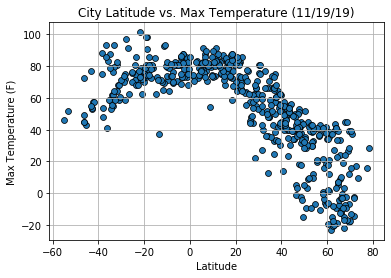

In [37]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=35, edgecolor="black", linewidth='0.75')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (11/19/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig(os.path.join("..","Images","Lat_Max_Temp.png"))


#### Latitude vs. Humidity Plot

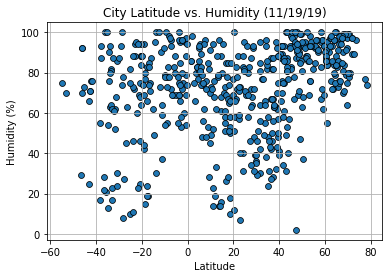

In [38]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=35, edgecolor="black", linewidth='0.75')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11/19/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig(os.path.join("..","Images","Lat_Humidity.png"))

#### Latitude vs. Cloudiness Plot

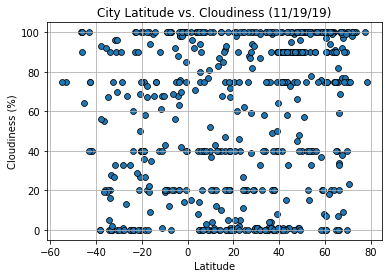

In [39]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=35, edgecolor="black", linewidth='0.75')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11/19/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig(os.path.join("..","Images","Lat_Cloudiness.png"))

#### Latitude vs. Wind Speed Plot

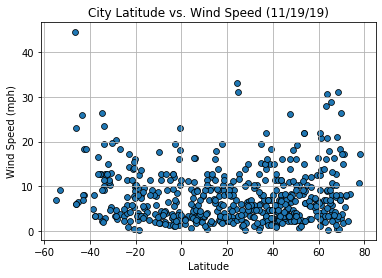

In [41]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=35, edgecolor="black", linewidth='0.75')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11/19/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig(os.path.join("..","Images","Lat_Wind_Speed.png"))